In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#pip install hankel

     |████████████████████████████████| 532 kB 10.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
from scipy.interpolate import interp1d
import hankel
from hankel import HankelTransform 
from hankel import SymmetricFourierTransform
from scipy.fft import fft2, ifft, fftfreq, fftshift, rfft2, rfftfreq, hfft, rfft, fft

In [3]:
pcf_ginibre = lambda x : 1 - np.exp(-x**2)
h_ginibre = lambda x : - np.exp(-x**2)
true_sf_ginibre = lambda x : 1 - np.exp(-x**2/4)

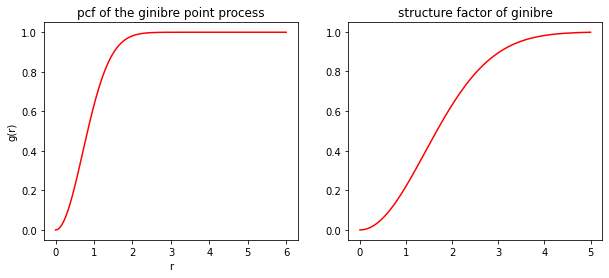

In [5]:
r = np.linspace(0, 6, 1000 )
wave_lengh = np.logspace(-12, 1, 1000)/2
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(r, pcf_ginibre(r), 'r')
ax[0].title.set_text('pcf of the ginibre point process')
ax[0].set_xlabel('r')
ax[0].set_ylabel('g(r)')
ax[1].plot(wave_lengh, true_sf_ginibre(wave_lengh), 'r')
ax[1].title.set_text('structure factor of ginibre')
plt.show()

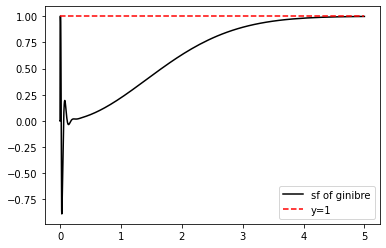

In [7]:
ft = SymmetricFourierTransform(ndim=2, N=1000, h=0.01)
sf_ginibre = 1 + 1/np.pi*(ft.transform(h_ginibre, wave_lengh, ret_err=False))
plt.plot(wave_lengh, sf_ginibre, 'k', label="sf of ginibre")
plt.plot(wave_lengh, np.ones((wave_lengh.shape)), 'r--', label="y=1")
plt.legend()
plt.show()

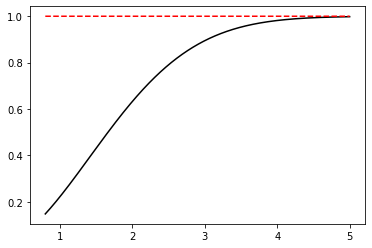

In [109]:
wave_lengh_2 = np.linspace(0.8,5, 2000)
sf_gin_2 = 1 + 1/np.pi*ft.transform(h_ginibre, wave_lengh_2, ret_err=False)
plt.plot(wave_lengh_2, sf_gin_2, 'k', label="sf pf ginibre")
plt.plot(wave_lengh_2, np.ones((wave_lengh_2.shape)), 'r--', label="y=1")
plt.legend
plt.show()

In [106]:
print(sf_gin_2)
print(true_sf_ginibre(wave_lengh_2))

[0.06054611 0.0610751  0.06160642 ... 0.9980477  0.99805865 0.99806955]
[0.06058694 0.06111666 0.06164847 ... 0.9980477  0.99805865 0.99806955]


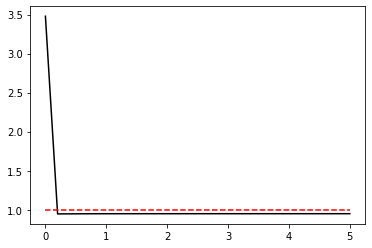

In [120]:
r_r = np.linspace(2, 5, 50 )
real_fft_ginibre = abs((1/(2*np.pi**2))*(rfft(pcf_ginibre(r_r)) - 1) +1)
fs = (int(50) )/max(r_r)
k = rfftfreq(50 )*fs
plt.plot(k, real_fft_ginibre, 'k')
plt.plot(k, np.ones((k.shape)), 'r--')
                                            

In [121]:
print(real_fft_ginibre)
print(true_sf_ginibre(k))

[3.47845589 0.94594584 0.94691787 0.94765722 0.94808955 0.94833581
 0.9484832  0.94857679 0.94863938 0.94868308 0.94871467 0.94873816
 0.94875603 0.94876988 0.94878077 0.94878943 0.94879637 0.94880196
 0.94880646 0.94881007 0.94881293 0.94881515 0.9488168  0.94881794
 0.94881861 0.94881884]
[0.         0.00995017 0.03921056 0.08606881 0.14785621 0.22119922
 0.30232367 0.38737361 0.47270758 0.55514193 0.63212056 0.70180272
 0.76307224 0.81548048 0.85914158 0.89460078 0.92269526 0.94442379
 0.9608361  0.97294815 0.98168436 0.98784482 0.99209295 0.99495824
 0.99684889 0.99806955]
